We explored trends in unemployment data using line charts. The unemployment data we worked with had 2 columns:

* `DATE` - monthly time stamp
* `VALUE` - unemployment rate (in percent)

Line charts were an appropriate choice for visualizing this dataset because the rows had a natural ordering to it

Each row reflected information about an event that occurred after the previous row. Changing the order of the rows would make the line chart inaccurate. The lines from one marker to the next helped emphasize the logical connection between the data points.

Here we'll be working with a dataset that has no particular order. 

To investigate the potential bias that movie reviews site have, **FiveThirtyEight** compiled data for 147 films from 2015 that have substantive reviews from both critics and consumers. Every time Hollywood releases a movie, critics from `Metacritic`, `Fandango`, `Rotten Tomatoes`, and `IMDB` review and rate the film. They also ask the users in their respective communities to review and rate the film. Then, they calculate the average rating from both critics and users and display them on their site.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

reviews = pd.read_csv("fandango_scores.csv")
print(reviews.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        146 non-null    object 
 1   RottenTomatoes              146 non-null    int64  
 2   RottenTomatoes_User         146 non-null    int64  
 3   Metacritic                  146 non-null    int64  
 4   Metacritic_User             146 non-null    float64
 5   IMDB                        146 non-null    float64
 6   Fandango_Stars              146 non-null    float64
 7   Fandango_Ratingvalue        146 non-null    float64
 8   RT_norm                     146 non-null    float64
 9   RT_user_norm                146 non-null    float64
 10  Metacritic_norm             146 non-null    float64
 11  Metacritic_user_nom         146 non-null    float64
 12  IMDB_norm                   146 non-null    float64
 13  RT_norm_round               146 non

In [2]:
reviews.head(1)

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.7,4.3,...,3.9,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5


FiveThirtyEight compiled this dataset to investigate if there was any bias to Fandango's ratings. In addition to aggregating ratings for films, Fandango is unique in that it also sells movie tickets, and so it has a direct commercial interest in showing higher ratings. After discovering that a few films that weren't good were still rated highly on Fandango, the team investigated and published [an article about bias in movie ratings](https://fivethirtyeight.com/features/fandango-movies-ratings/).

Here are the columns we'll be working with in this file:

* `FILM` - film name
* `RT_user_norm` - average user rating from Rotten Tomatoes, normalized to a 1 to 5 point scale
* `Metacritic_user_nom` - average user rating from Metacritic, normalized to a 1 to 5 point scale
* `IMDB_norm` - average user rating from IMDB, normalized to a 1 to 5 point scale
* `Fandango_Ratingvalue` - average user rating from Fandango, normalized to a 1 to 5 point scale
* `Fandango_Stars` - the rating displayed on the Fandango website (rounded to nearest star, 1 to 5 point scale)

Instead of displaying the raw rating, the writer discovered that Fandango usually rounded the average rating to the next highest half star (next highest 0.5 value). The `Fandango_Ratingvalue` column reflects the true average rating while the `Fandango_Stars` column reflects the displayed, rounded rating.

These sites use different scales for ratings. Some use a 5 star scale while others use a 100 point scale. In addition, **Metacritic** and **Rotten Tomatoes** aggregate scores from both **users** and **film critics**, while **IMDB** and **Fandango** aggregate only from their **users**. We'll focus on just the average scores from `users`, because not all of the sites have scores from `critics`.

The `RT_user_norm`, `Metacritic_user_nom`, `IMDB_norm`, and `Fandango_Ratingvalue` columns contain the average user rating for each movie, normalized to a 0 to 5 point scale. This allows us to compare how the users on each site rated a movie

In [7]:
norm_reviews = reviews[['FILM', 'RT_user_norm','Metacritic_user_nom',
       'IMDB_norm', 'Fandango_Ratingvalue','Fandango_Stars']]

norm_reviews.head(1)

,FILM,RT_user_norm,Metacritic_user_nom,IMDB_norm,Fandango_Ratingvalue,Fandango_Stars
0,Avengers: Age of Ultron (2015),4.3,3.55,3.9,4.5,5.0


If we look at the first row, which lists the average user ratings for Avengers: **Age of Ultron (2015)**, we'll notice that the **Fandango** ratings, both the actual and the displayed rating, are higher than those from the other sites for a given movie. While calculating and comparing summary statistics give us hard numbers for quantifying the bias, visualizing the data using plots can help us gain a more intuitive understanding. We need a visualization that scales graphical objects to the quantitative values we're interested in comparing. One of these visualizations is a bar plot.

An effective `bar plot` uses **categorical values** on one axis and numerical values on the other axis.

If the x-axis contains the categorical values and the rectangular bars are scaled vertically, this is known as a **vertical bar** plot. A horizontal bar plot flips the axes, which is useful for quickly spotting the largest value.

An effective bar plot uses a consistent width for each bar. This helps keep the visual focus on the heights of the bars when comparing

We need to specify the `positions` of the bars, the `widths` of the bars, and the `positions of the axis labels`. 

We can generate a vertical bar plot using either `pyplot.bar()` or `Axes.bar()`. We'll use `Axes.bar()` so we can extensively customize the bar plot more easily. We can use `pyplot.subplots()` to first generate a single subplot and return both the `Figure` and `Axes` object. This is a shortcut from the technique we used before

The `Axes.bar()` method has 2 required parameters, `left` and `height`. We use the `left` parameter to specify the `x` coordinates of the left sides of the bar 

We use the `height` parameter to specify the height of each bar. Both of these parameters accept a list-like object.

The `np.arange()` function returns evenly spaced values. We use `arange()` to generate the positions of the left side of our bars.

We'll also want to add space between our bars for better readability

We can also use the width parameter to specify the width of each bar. This is an optional parameter and the width of each bar is set to `0.8` by default.

In [19]:
bar_position = np.arange(5) +.75
print(bar_position)
bar_height = norm_reviews.loc[0][1:].values
print(bar_height)

[0.75 1.75 2.75 3.75 4.75]
[4.3 3.55 3.9 4.5 5.0]


<BarContainer object of 5 artists>

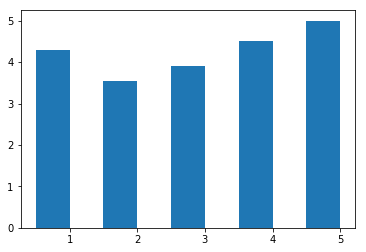

In [20]:
plt.bar(bar_position,bar_height,0.5)

In [1]:
# Alternative method of above method
# fig, ax = plt.subplots() # shortcut
# ax.bar(bar_positions, bar_heights, 0.5)
# plt.show()

By default, matplotlib sets the x-axis tick labels to the integer values the bars spanned on the x-axis (from 0 to 6).

We only need tick labels on the x-axis where the bars are positioned. We can use `Axes.set_xticks()` to change the positions of the ticks to `[1, 2, 3, 4, 5]`:

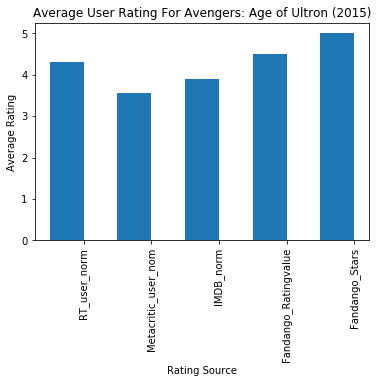

In [35]:
fig, ax = plt.subplots()
bar_position = np.arange(5) + .75
bar_height = norm_reviews.iloc[0][1:].values
ax.bar(bar_position, bar_height, 0.5)
ax.set_xticks(range(1,6))
ax.set_xticklabels(['RT_user_norm', 'Metacritic_user_nom', 'IMDB_norm', 
                    'Fandango_Ratingvalue', 'Fandango_Stars'], rotation = 90)
ax.set_xlabel("Rating Source")
ax.set_ylabel("Average Rating")
ax.set_title("Average User Rating For Avengers: Age of Ultron (2015)")
plt.show()

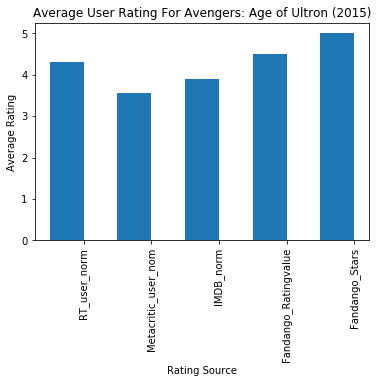

In [58]:
# alternate method for above single plot
# fig =  plt.figure()
# ax = fig.add_subplot(1,1,1)
# plt.bar(bar_position, bar_height,0.5)
# plt.xticks(range(1,6))
# ax.set_xticklabels(['RT_user_norm', 'Metacritic_user_nom', 'IMDB_norm', 'Fandango_Ratingvalue', 'Fandango_Stars'], rotation = 90)
# plt.xlabel("Rating Source")
# plt.ylabel("Average Rating")
# plt.title("Average User Rating For Avengers: Age of Ultron (2015)")
# plt.show()

We can create a horizontal bar plot in matplotlib in a similar fashion. Instead of using `Axes.bar()`, we use `Axes.barh()`. This method has 2 required parameters, `bottom` and `width`. We use the bottom parameter to specify the `y` coordinate for the bottom sides for the bars and the `width` parameter to specify the lengths of the bars

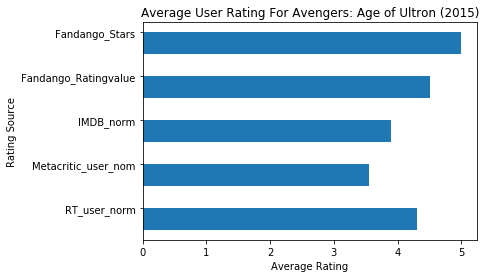

In [65]:
fig, ax = plt.subplots()

ax.barh(bar_position, bar_height,0.5)
ax.set_yticks(range(1,6))
ax.set_yticklabels(['RT_user_norm', 'Metacritic_user_nom', 'IMDB_norm', 
                    'Fandango_Ratingvalue', 'Fandango_Stars'])
ax.set_xlabel("Average Rating")
ax.set_ylabel("Rating Source")
ax.set_title("Average User Rating For Avengers: Age of Ultron (2015)")
plt.show()


From the horizontal bar plot, we can more easily determine that the 2 average scores from Fandango users are higher than those from the other sites. While bar plots help us visualize a few data points to quickly compare them, they aren't good at helping us visualize many data points. Let's look at a plot that can help us visualize many points.

The line charts we generated always connected points from left to right. This helped us show the trend, up or down, between each point as we scanned visually from left to right. Instead, we can avoid using lines to connect markers and just use the underlying markers. A plot containing just the markers is known as a **scatter plot**.

A scatter plot helps us determine if 2 columns are weakly or strongly correlated. While calculating the correlation coefficient will give us a precise number, a scatter plot helps us find outliers, gain a more intuitive sense of how spread out the data is, and compare more easily.

To generate a scatter plot, we use `Axes.scatter()`. The `scatter()` method has 2 required parameters, `x` and `y`, which matches the parameters of the `plot()` method. The values for these parameters need to be iterable objects of matching lengths (`lists`, `NumPy arrays`, or `pandas series`).

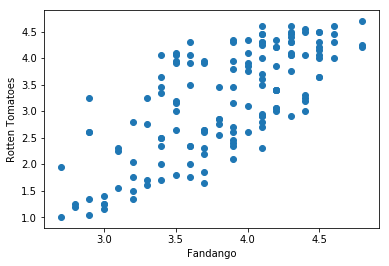

In [70]:
# Scatter plot that visualizes the relationship between the Fandango_Ratingvalue and RT_user_norm columns

fig, ax = plt.subplots()

ax.scatter(norm_reviews["Fandango_Ratingvalue"],norm_reviews["RT_user_norm"])
ax.set_xlabel("Fandango")
ax.set_ylabel('Rotten Tomatoes')
plt.show()

The scatter plot suggests that there's a weak, positive correlation between the user ratings on Fandango and the user ratings on Rotten Tomatoes. The correlation is weak because for many x values, there are multiple corresponding y values. The correlation is positive because, in general, as x increases, y also increases.

When using scatter plots to understand how 2 variables are correlated, it's usually not important which one is on the x-axis and which one is on the y-axis. This is because the relationship is still captured either way, even if the plots look a little different.

Let's see what happens when we flip the columns.

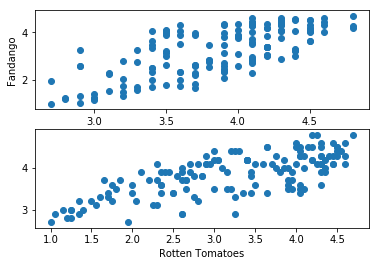

In [75]:
fig = plt.figure()
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)

ax1.scatter(norm_reviews["Fandango_Ratingvalue"],norm_reviews["RT_user_norm"])
ax1.set_xlabel("Fandango")
ax1.set_ylabel('Rotten Tomatoes')

ax2.scatter(norm_reviews["RT_user_norm"],norm_reviews["Fandango_Ratingvalue"])
ax2.set_xlabel('Rotten Tomatoes')
ax1.set_ylabel("Fandango")

plt.show()

The second scatter plot is a mirror reflection of the first scatter plot. The nature of the correlation is still reflected, however, which is the important thing

When generating multiple scatter plots for the purpose of comparison, it's important that all plots share the same ranges in the x-axis and y-axis. In the 2 plots we generated in the last step, the ranges for both axes didn't match. We can use `Axes.set_xlim()` and `Axes.set_ylim()` to set the data limits for both axes:

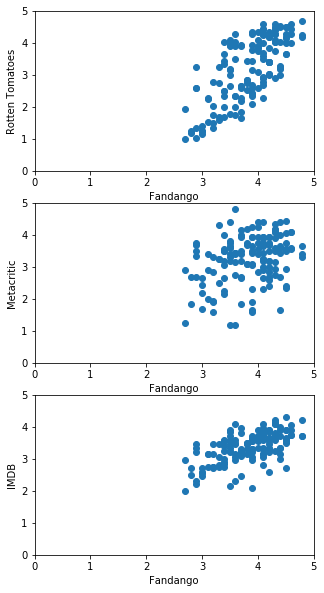

In [88]:
# Generate scatter plots to see how Fandango ratings correlate with all 3 of the other review sites.
fig = plt.figure(figsize=(5,10))

ax1 = fig.add_subplot(3,1,1)
ax2 = fig.add_subplot(3,1,2)
ax3 = fig.add_subplot(3,1,3)

ax1.scatter(norm_reviews["Fandango_Ratingvalue"], norm_reviews["RT_user_norm"])
ax1.set_xlabel("Fandango")
ax1.set_ylabel("Rotten Tomatoes")
ax1.set_xlim(0,5)
ax1.set_ylim(0,5)


ax2.scatter(norm_reviews["Fandango_Ratingvalue"], norm_reviews["Metacritic_user_nom"])
ax2.set_xlabel("Fandango")
ax2.set_ylabel("Metacritic")
ax2.set_xlim(0,5)
ax2.set_ylim(0,5)

ax3.scatter(norm_reviews["Fandango_Ratingvalue"], norm_reviews["IMDB_norm"])
ax3.set_xlabel("Fandango")
ax3.set_ylabel("IMDB")
ax3.set_xlim(0,5)
ax3.set_ylim(0,5)
            
plt.show()


From the scatter plots, we can conclude that user ratings from IMDB and Fandango are the most similar. In addition, user ratings from Metacritic and Rotten Tomatoes have positive but weak correlations with user ratings from Fandango. We can also notice that user ratings from Metacritic and Rotten Tomatoes span a larger range of values than those from IMDB or Fandango. User ratings from Metacritic and Rotten Tomatoes range from 1 to 5. User ratings from Fandango range approximately from 2.5 to 5 while those from IMDB range approximately from 2 to 4.5

The scatter plots unfortunately only give us a cursory understanding of the distributions of user ratings from each review site. For example, if a hundred movies had the same average user rating from IMDB and Fandango in the dataset, we would only see a single marker in the scatter plot.